In [1]:
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename='testing_files/plate1_final_X4Y-2.jpg'

In [3]:
def load_image(file, notebook=False):
    """
    Loads a file in with OpenCV for diameter detection
    :param file: Path of file to be loaded
    :param notebook: display loaded image in a jupyter notebook
    :return: loaded image
    """
    image = cv.imread(file)
    if notebook:
        # jupyter notebook will use matplotlib which requires RGB format
        image_nb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image_nb)
        plt.axis('off')
        plt.title('Original Image', backgroundcolor='white')
    return image

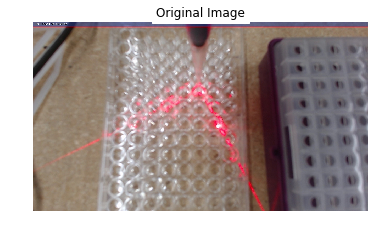

In [4]:
img = load_image(filename, notebook=True)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


Text(0.5, 1.0, 'Red Detected')

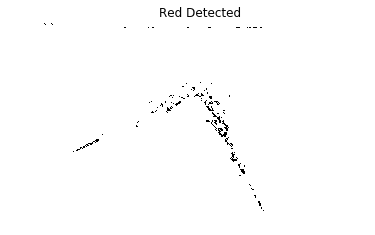

In [5]:
%time
img_copy = img
# If neighboring pixels are red, then more likely to make it into mask
red_thresh_low = 200
green_thresh_high = 130
blue_thresh_high = 130
img[0][0]
for idx, row in enumerate(img):
    for jdx, col in enumerate(row):
        if (col[2] > red_thresh_low) and (col[0] < blue_thresh_high) and (col[1] < green_thresh_high):
            trace = cv.circle(img_copy,(jdx, idx), 1, color=(0,0,0))


gray= cv.cvtColor(trace, cv.COLOR_BGR2GRAY)            
            
ret, thresh=cv.threshold(gray, thresh=10, maxval=255, type=cv.THRESH_BINARY)
            
            
#trace_nb = cv.cvtColor(trace, cv.COLOR_BGR2RGB)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Red Detected', backgroundcolor='white')

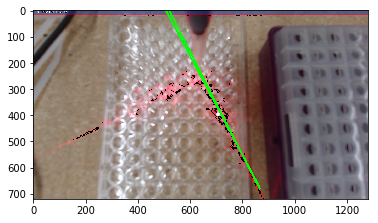

In [8]:
img_copy2=img
edges = cv.Canny(thresh, 50, 150, apertureSize = 3)
minLineLength = 10
maxLineGap = 10
lines = cv.HoughLines(edges,5,np.pi/180*2,10)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    lines_baby = cv.line(img_copy2,(x2,y2),(x1,y1),(0,255,0),5)

plt.imshow(cv.cvtColor(lines_baby, cv.COLOR_BGR2RGB))

In [7]:
.11*365

40.15